# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

In [ ]:
df_data.columns

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data.drop(labels=['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data.head()

In [ ]:
# So far I will leave the NaN values on the Price columns so I do not lose entries
# I will create a separate clean_df below just to plot the price related info
df_data.isna().any()

In [ ]:
df_data.duplicated().any()
df_data.drop_duplicates(inplace=True)


## Descriptive Statistics

In [ ]:
df_data.describe()

In [ ]:
df_data.head(10)

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
company = df_data["Organisation"].value_counts()
company.head(5)

In [ ]:
fig = px.pie(labels=company[:10].index,
             values=company[:10].values,
             title = "TOP10 Number of launches per Organization",
             names = company[:10].index,
             hole = 0.6
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

In [ ]:
fig = px.bar(x = company.index[:15],
             y= company.values[:15],
             title="Top Organizations",
             hover_name=company.index[:15],
             color=company.values[:15],
             color_continuous_scale='Agsunset')
fig.update_layout(yaxis_title='Number of launches',xaxis_title="Organization", coloraxis_showscale=False)
fig.show()

Seeing that the USSR performed a lot of launches, now I am interested in seeing how many of them were succesfull.

In [ ]:
df_data.Mission_Status.value_counts()

In [ ]:
# Using as_index=False we push all the data into columns rather than end up with our Categories as the index
df_success = df_data.groupby(["Organisation", "Mission_Status"], as_index=False).agg({"Detail": pd.Series.count})
df_success.sort_values(by="Detail", ascending=False, inplace=True)
df_success.head(10)

In [ ]:
fig = px.bar(x=df_success.Organisation,
             y=df_success.Detail,
             title="Succesful vs Failed Launches by Organization",
             color=df_success.Mission_Status,
             barmode="group")

fig.update_layout(yaxis_title='Number of Launches',
                  xaxis_title="Organization",
                  # yaxis=dict(type='log'),
                  # alt xaxis={'categoryorder':'total descending'}
                  xaxis_tickangle=45)

fig.update_xaxes(categoryorder='total descending')
fig.update_yaxes(type='log')

fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
status = df_data["Rocket_Status"].value_counts()
status.head(5)

In [ ]:
fig = px.pie(labels=status.index,
             values=status.values,
             title = "Number of Active versus Retired Rockets",
             names = status.index,
             hole = 0.6
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission = df_data["Mission_Status"].value_counts()
mission.head(5)

In [ ]:
fig = px.pie(labels=mission.index,
             values=mission.values,
             title = "Mission Status",
             names = mission.index,
             hole = 0.6
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
# Create a clean DataFrame where we drop the NaN values in the Price column
# Also transform to numeric (get rid of commas first)

# Remove NaN values before proceeding
clean_df = df_data.dropna()
print(clean_df.shape)

# Remove commas from the strings before transforming them to numeric data
clean_df["Price"] = clean_df["Price"].astype(str).str.replace(",","")
clean_df["Price"] = pd.to_numeric(clean_df["Price"])
print(clean_df.info())

In [ ]:
clean_df.sort_values("Price", ascending=False, inplace=True)

In [ ]:
sns.displot(data=clean_df,
            x="Price",
            kind="hist",
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f"Price per launch")
plt.xlabel("Price in million $")
plt.ylabel('Nr. of Launches')

plt.show()

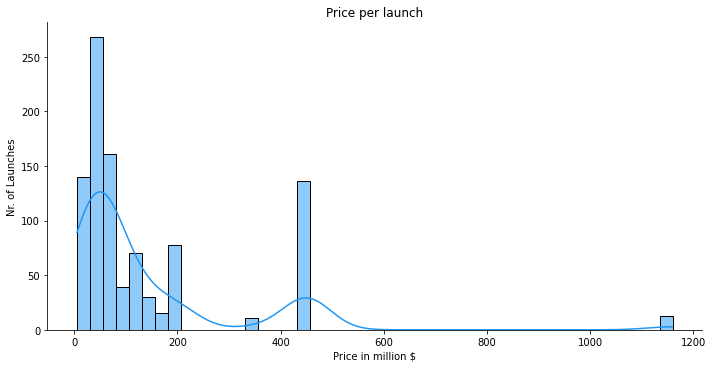

In [ ]:
# Remove those 2 first 5000m $ data points and plot price distribution again
sns.displot(data=clean_df[2:],
            x="Price",
            kind="hist",
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f"Price per launch")
plt.xlabel("Price in million $")
plt.ylabel('Nr. of Launches')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
# Process the Location column string to extract the country and store it in a separate Country columns
# The str[-1] at the end of the line returns the last element of the list resulting from splitting the "Location" column on commas. 
# This last element will be stored in the "Country_list" column.
df_data["Country"] = df_data["Location"].astype(str).str.split(", ").str[-1]
df_data["Country"].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In [ ]:
df_data["Country"] = df_data["Country"].replace("Barents Sea", "Russia")
df_data["Country"] = df_data["Country"].replace("Russian Federation", "Russia")
df_data["Country"] = df_data["Country"].replace("New Mexico", "USA")
df_data["Country"] = df_data["Country"].replace("Shahrud Missile Test Site", "Iran")
df_data["Country"] = df_data["Country"].replace("Gran Canaria", "USA")
df_data["Country"] = df_data["Country"].replace("Pacific Missile Range Facility", "USA")
df_data["Country"] = df_data["Country"].replace("Yellow Sea", "China")
launches_by_country = df_data["Country"].value_counts()


In [ ]:
fig = px.pie(labels=launches_by_country[:10].index,
             values=launches_by_country[:10].values,
             title = "Launches by country",
             names = launches_by_country[:10].index,
             hole = 0.6
             )
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
# No need to change countries to ISO code setting locationmode to country names
world_map = px.choropleth(locations=launches_by_country.index,
                          locationmode='country names',
                          color=launches_by_country.values,
                          hover_name=launches_by_country.index,
                          color_continuous_scale='matter',
                          title="Number of launches per country")

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

This code first imports the necessary packages, including pandas and iso3166. It then creates a dictionary that maps country names to their alpha3 ISO codes using the countries function from the iso3166 package.

Next, the code creates a copy of the "Countries" column in the DataFrame using the standard df_data["Countries"] notation, and names the copy "ISO". This new column initially contains the same data as the "Countries" column.

Finally, the code replaces the country names in the "ISO" column with their corresponding alpha3 ISO codes using the replace method on the "ISO" column, using the country_dict dictionary to perform the replacement. Note that we use the inplace=True parameter to modify the DataFrame in place, rather than creating a new copy of it.

In [ ]:
# Alternative using ISO codes for countries
# Create a copy of the original df_data
df_data_ISO = df_data

# Create a dictionary of country names to alpha3 ISO codes (using dictionary/list comprehension)
country_dict = {c.name: c.alpha3 for c in countries}

# Create a copy of the "Countries" column as the "ISO" column
df_data_ISO["ISO"] = df_data_ISO["Country"]

# Replace country names with alpha3 ISO codes
df_data_ISO["ISO"].replace(country_dict, inplace=True)

In [ ]:
launches_by_country_2 = df_data_ISO["ISO"].value_counts()

In [ ]:
world_map = px.choropleth(locations=launches_by_country_2.index,
                          color=launches_by_country_2.values,
                          hover_name=launches_by_country_2.index,
                          color_continuous_scale='matter',
                          title="Number of launches per country")

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df_data["Mission_Status"].value_counts()

Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
# I am going to consider Partial Failures and Prelaunch Failures as part of the Failure category (aggregated)
df_data_fail_aggr = df_data
df_data_fail_aggr["Mission_Status"] = df_data_fail_aggr["Mission_Status"].replace("Partial Failure", "Failure")
df_data_fail_aggr["Mission_Status"] = df_data_fail_aggr["Mission_Status"].replace("Prelaunch Failure", "Failure")
df_data_fail_aggr["Mission_Status"].value_counts()


Success    3878
Failure     445
Name: Mission_Status, dtype: int64

In [ ]:
# Using as_index=False we push all the data into columns rather than end up with our Categories as the index
df_mstatus_country = df_data_fail_aggr.groupby(["Country", "Mission_Status"], as_index=False).agg({"Detail": pd.Series.count})
df_mstatus_country.sort_values(by="Detail", ascending=False, inplace=True)
df_mstatus_country.head(10)

,Country,Mission_Status,Detail
27,Russia,Success,1303
31,USA,Success,1188
18,Kazakhstan,Success,608
8,France,Success,285
6,China,Success,243
30,USA,Failure,163
16,Japan,Success,113
17,Kazakhstan,Failure,93
26,Russia,Failure,92
10,India,Success,63


In [ ]:
df_failure_country = df_mstatus_country[df_mstatus_country["Mission_Status"] == "Failure"]
df_failure_country



,Country,Mission_Status,Detail
30,USA,Failure,163
17,Kazakhstan,Failure,93
26,Russia,Failure,92
5,China,Failure,25
7,France,Failure,18
9,India,Failure,13
15,Japan,Failure,13
11,Iran,Failure,9
4,Brazil,Failure,3
22,North Korea,Failure,3


In [ ]:
world_map = px.choropleth(locations=df_failure_country["Country"],
                          locationmode="country names",
                          color=df_failure_country["Detail"],
                          hover_name=df_failure_country["Country"],
                          color_continuous_scale='matter',
                          title="Number of failures per country")

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

Calculating mission success and failure rate and including them as new columns into the df_mstatus_country DataFrame

In [ ]:
df_mstatus_country.head(10)

,Country,Mission_Status,Detail
27,Russia,Success,1303
31,USA,Success,1188
18,Kazakhstan,Success,608
8,France,Success,285
6,China,Success,243
30,USA,Failure,163
16,Japan,Success,113
17,Kazakhstan,Failure,93
26,Russia,Failure,92
10,India,Success,63


In [ ]:
# Create a new DataFrame that groups the data by country and mission status
grouped_df = df_mstatus_country.groupby(["Country", "Mission_Status"]).sum().reset_index()

# Pivot the data to get separate columns for successes and failures
pivot_df = grouped_df.pivot(index="Country", columns="Mission_Status", values="Detail").reset_index()

# Rename the columns to something more meaningful
pivot_df.columns = ["Country", "Failures", "Successes"]

# Merge the new DataFrame back into the original DataFrame
merged_df = pd.merge(df_mstatus_country, pivot_df, on="Country")

#Calculating the success ratio
merged_df["Success Ratio"] = merged_df["Successes"] * 100 / (merged_df["Successes"] + merged_df["Failures"])
merged_df.fillna(0, inplace=True)


In [ ]:
world_map = px.choropleth(locations=merged_df["Country"],
                          locationmode="country names",
                          color=merged_df["Success Ratio"],
                          hover_name=merged_df["Country"],
                          color_continuous_scale='matter',
                          title="Success Ratio")

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
country_org_mstatus = df_data.groupby(by=["Country", "Organisation", "Mission_Status"],
                              as_index=False).agg({"Detail": pd.Series.count})
country_org_mstatus.head(5)

,Country,Organisation,Mission_Status,Detail
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [ ]:
burst = px.sunburst(country_org_mstatus,
                    values="Detail",
                    path=["Country", "Organisation", "Mission_Status"],
                    title="Mission Status by Country and Organization")

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_expenditure = clean_df.groupby(["Organisation"], as_index=False).agg({"Price": pd.Series.sum})
df_expenditure.sort_values(by="Price", ascending=False, inplace=True)


In [ ]:
fig = px.bar(x = df_expenditure["Organisation"],
             y= df_expenditure["Price"],
             title="Top Organizations Expenditure",
             hover_name=df_expenditure["Organisation"],
             color=df_expenditure["Price"],
             color_continuous_scale='Agsunset')
fig.update_layout(yaxis_title='Expenditure in $ million',xaxis_title="Organization", coloraxis_showscale=False)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

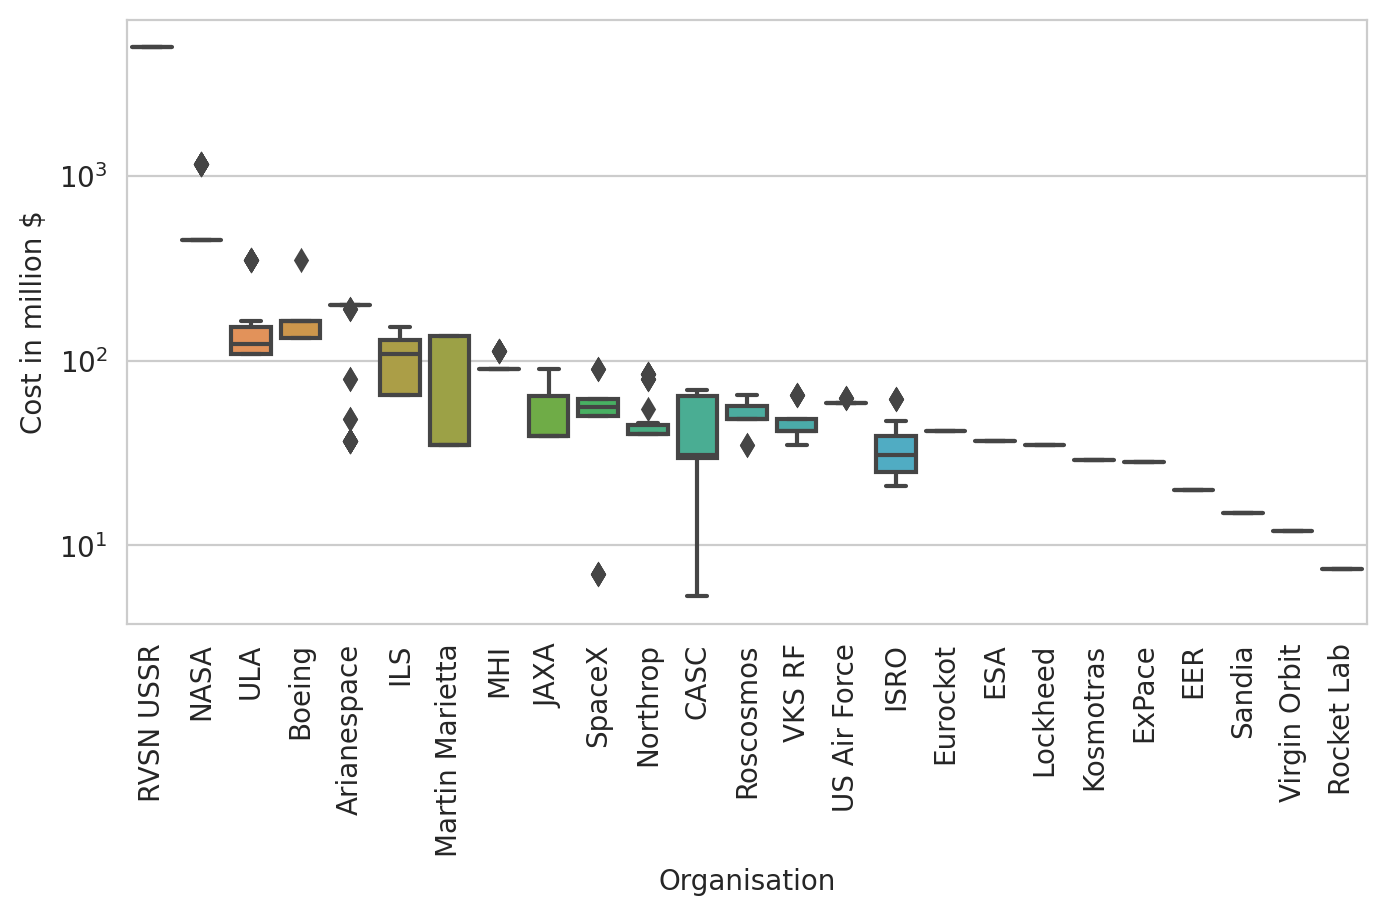

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  fig = sns.boxplot(data=clean_df,
                    x='Organisation',
                    y="Price")
  fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
  fig.set_ylabel('Cost in million $')
  plt.yscale('log')
plt.show()

# Chart the Number of Launches per Year

In [ ]:
df_data = pd.read_csv('mission_launches.csv')
df_data.drop(labels=['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data["Country"] = df_data["Location"].astype(str).str.split(", ").str[-1]
df_data["Country"] = df_data["Country"].replace("Russian Federation", "Russia")
df_data["Country"] = df_data["Country"].replace("New Mexico", "USA")
df_data["Country"] = df_data["Country"].replace("Shahrud Missile Test Site", "Iran")
df_data["Country"] = df_data["Country"].replace("Gran Canaria", "USA")
df_data["Country"] = df_data["Country"].replace("Pacific Missile Range Facility", "USA")
df_data["Country"] = df_data["Country"].replace("Yellow Sea", "China")


In [ ]:
# Create a copy of df_data in which I modify the Date column into datetime objects
df_data_dt = df_data

In [ ]:
# I had to change put UTC as True to avoid errors in the net steps
df_data_dt['Date'] = pd.to_datetime(df_data_dt['Date'], utc=True)

In [ ]:
df_data_dt["Launch Year"] = df_data_dt["Date"].dt.year
# Alternative
# df_data_dt['Launch Year'] = pd.DatetimeIndex(df_data_dt['Date']).year


In [ ]:
# Simple way just counting the number of times each Launch Year value appears
launches_per_year = df_data_dt.value_counts("Launch Year")
launches_per_year.sort_index(ascending=True, inplace=True)
launches_per_year

Launch Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Length: 64, dtype: int64

In [ ]:
# Alternative generating a DataFrame grouping by Launch Year and aggregating on Detail.count
launches_per_year_2 = df_data_dt.groupby(['Launch Year'], as_index=False).agg({'Detail': pd.Series.count})
launches_per_year_2

,Launch Year,Detail
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


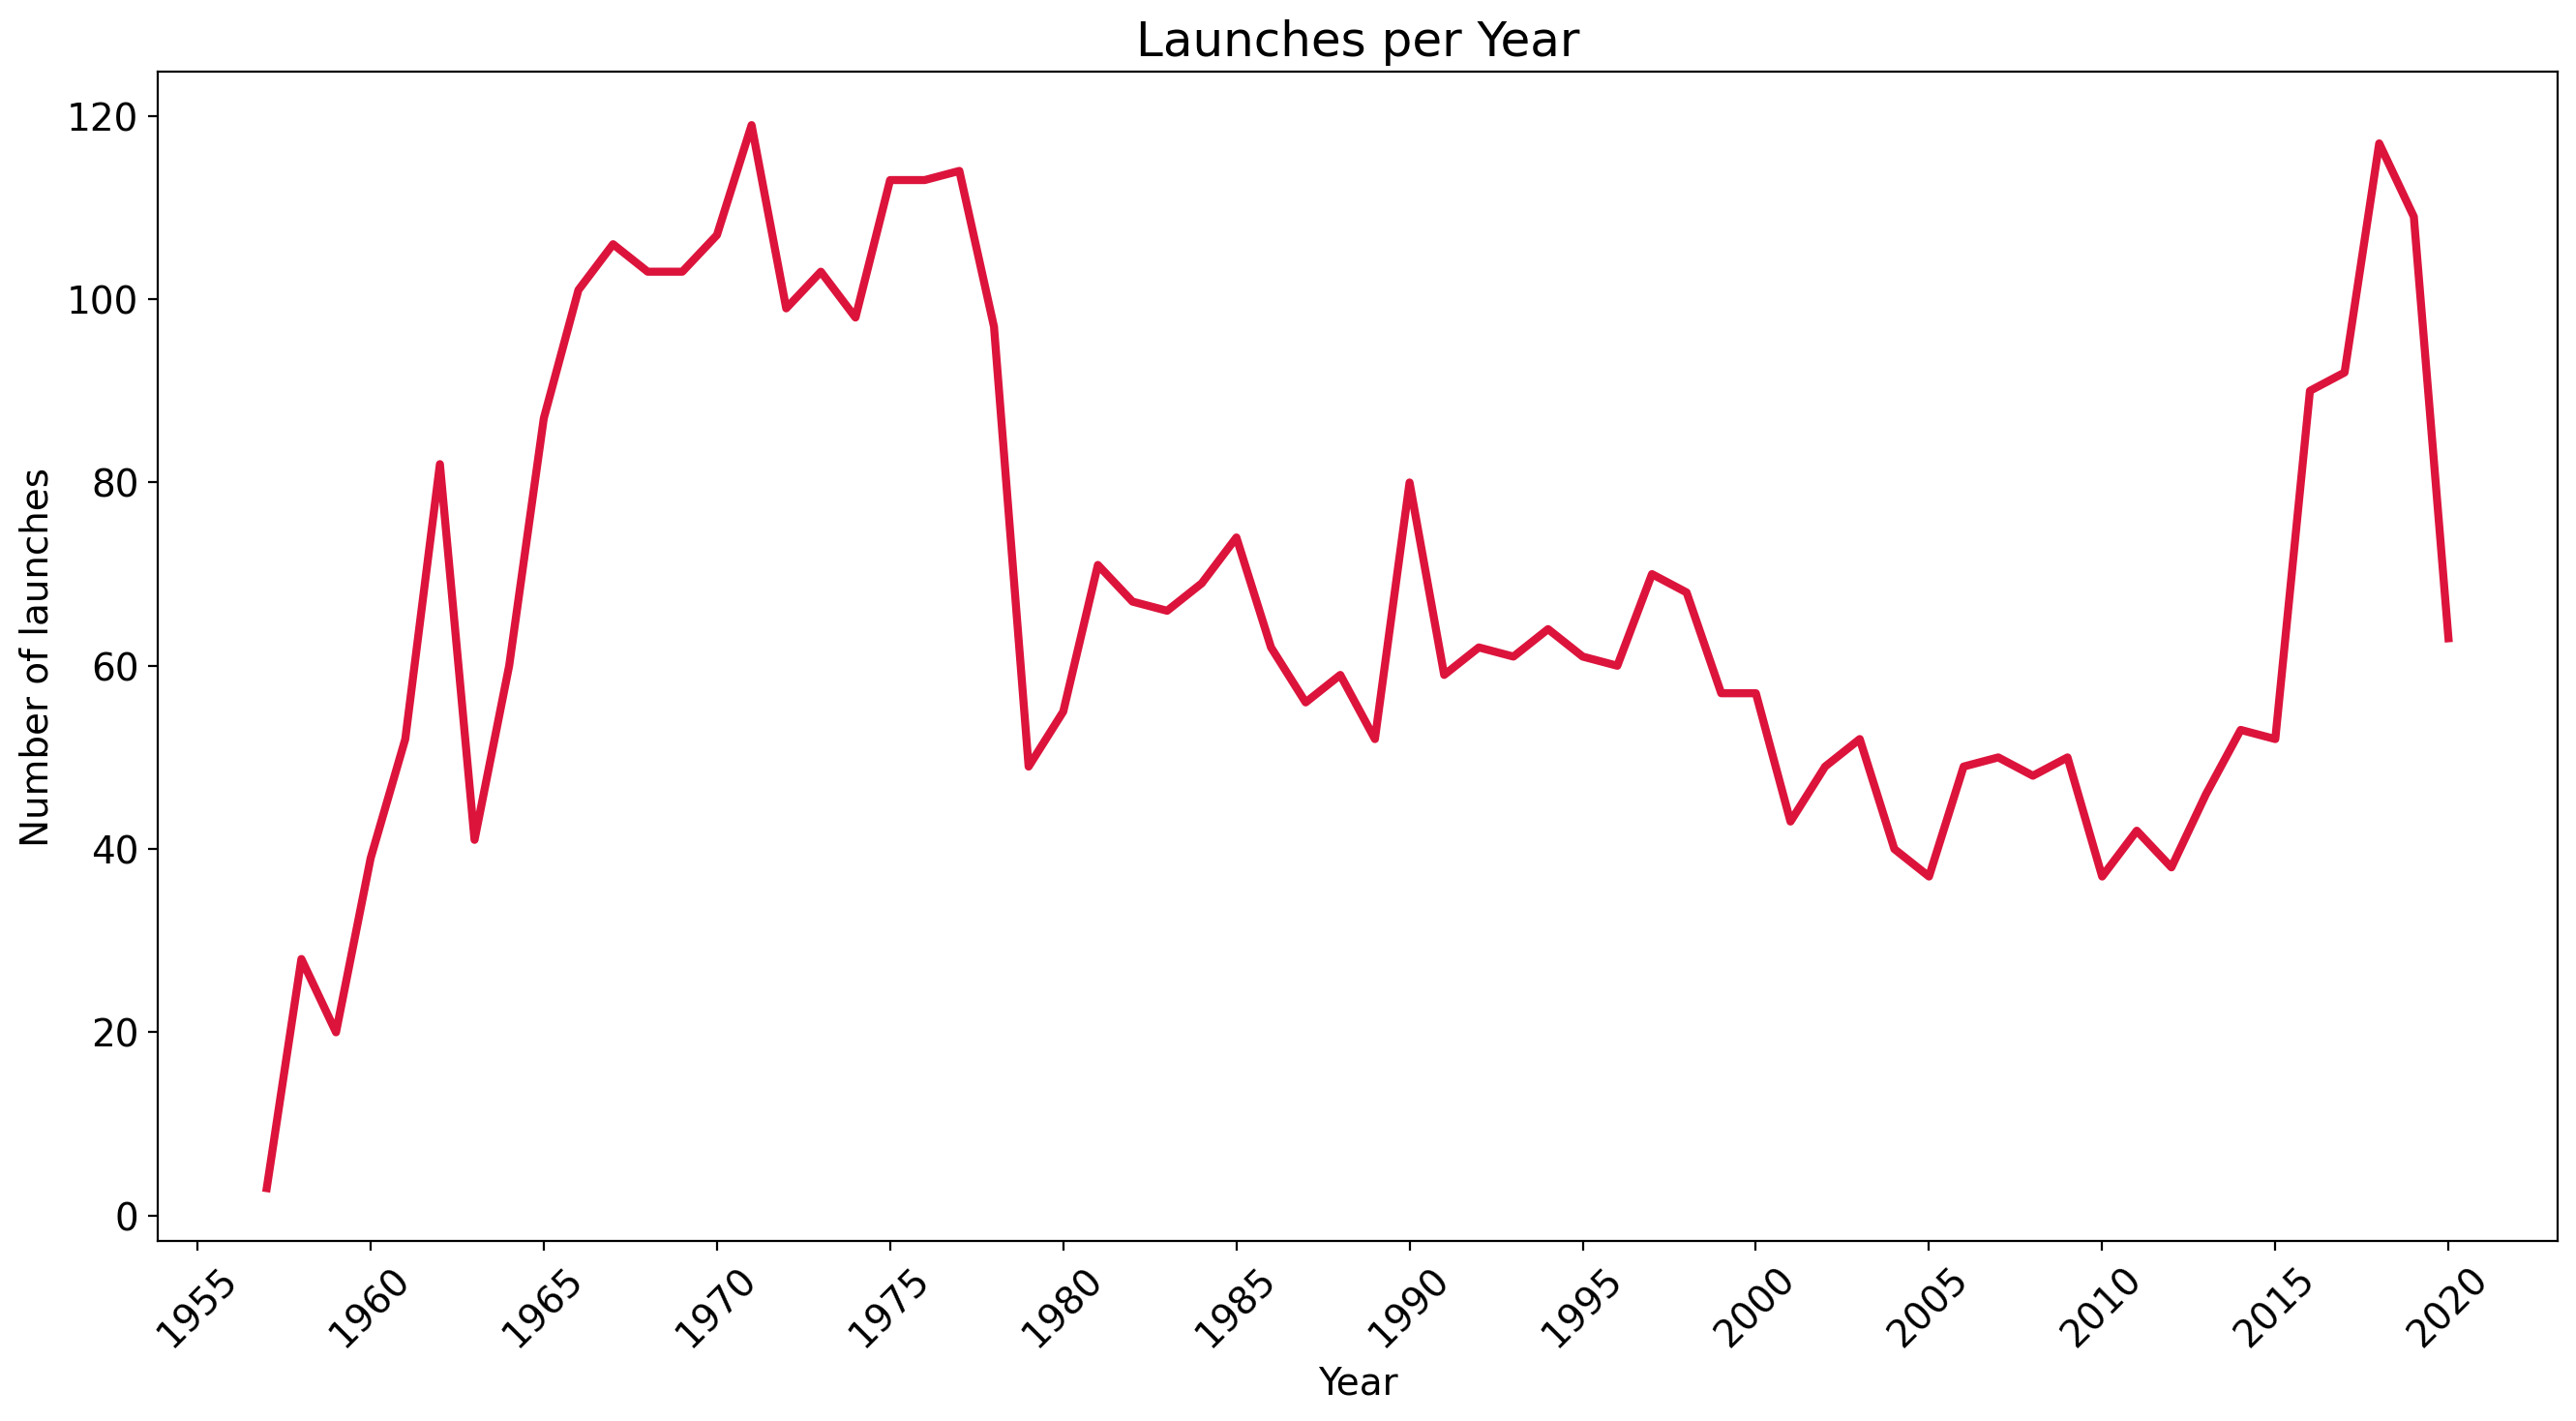

In [ ]:
plt.figure(figsize=(16,8), dpi=200)

plt.title("Launches per Year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of launches", fontsize=14)
plt.yticks(fontsize = 14) 
# Increase the size, rotate the labels on the x-axis and create 5-year tick marks
plt.xticks(ticks=np.arange(1950, 2025, step=5), fontsize=14, rotation=45)

plt.plot(launches_per_year.index,
         launches_per_year.values,
         color = "crimson",
         linewidth = 3)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
# Setting the date as index so later I can use the Grouper method
df_data_dt = df_data_dt.set_index("Date")
# DataFrame grouping by Month and Year and aggregating on Detail.count
launches_per_month = df_data_dt.groupby([pd.Grouper(freq="M")], as_index=True).agg({'Detail': pd.Series.count})
launches_per_month

,Detail
Date,
1957-10-31 00:00:00+00:00,1
1957-11-30 00:00:00+00:00,1
1957-12-31 00:00:00+00:00,1
1958-01-31 00:00:00+00:00,0
1958-02-28 00:00:00+00:00,2
...,...
2020-04-30 00:00:00+00:00,5
2020-05-31 00:00:00+00:00,9
2020-06-30 00:00:00+00:00,7


In [ ]:
# DataFrame grouping by Month and Year and aggregating on Detail.count
# launches_per_month_2 = df_data_dt.groupby([df_data_dt["Date"].dt.year, df_data_dt["Date"].dt.month], as_index=True).agg({'Detail': pd.Series.count})
# launches_per_month_2

In [ ]:
roll_launches_month = launches_per_month["Detail"].rolling(window=6).mean()

Date
1957-10-31 00:00:00+00:00         NaN
1957-11-30 00:00:00+00:00         NaN
1957-12-31 00:00:00+00:00         NaN
1958-01-31 00:00:00+00:00         NaN
1958-02-28 00:00:00+00:00         NaN
                               ...   
2020-04-30 00:00:00+00:00    9.666667
2020-05-31 00:00:00+00:00    9.166667
2020-06-30 00:00:00+00:00    7.666667
2020-07-31 00:00:00+00:00    8.666667
2020-08-31 00:00:00+00:00    7.666667
Freq: M, Name: Detail, Length: 755, dtype: float64

In [ ]:
import matplotlib.dates as mdates

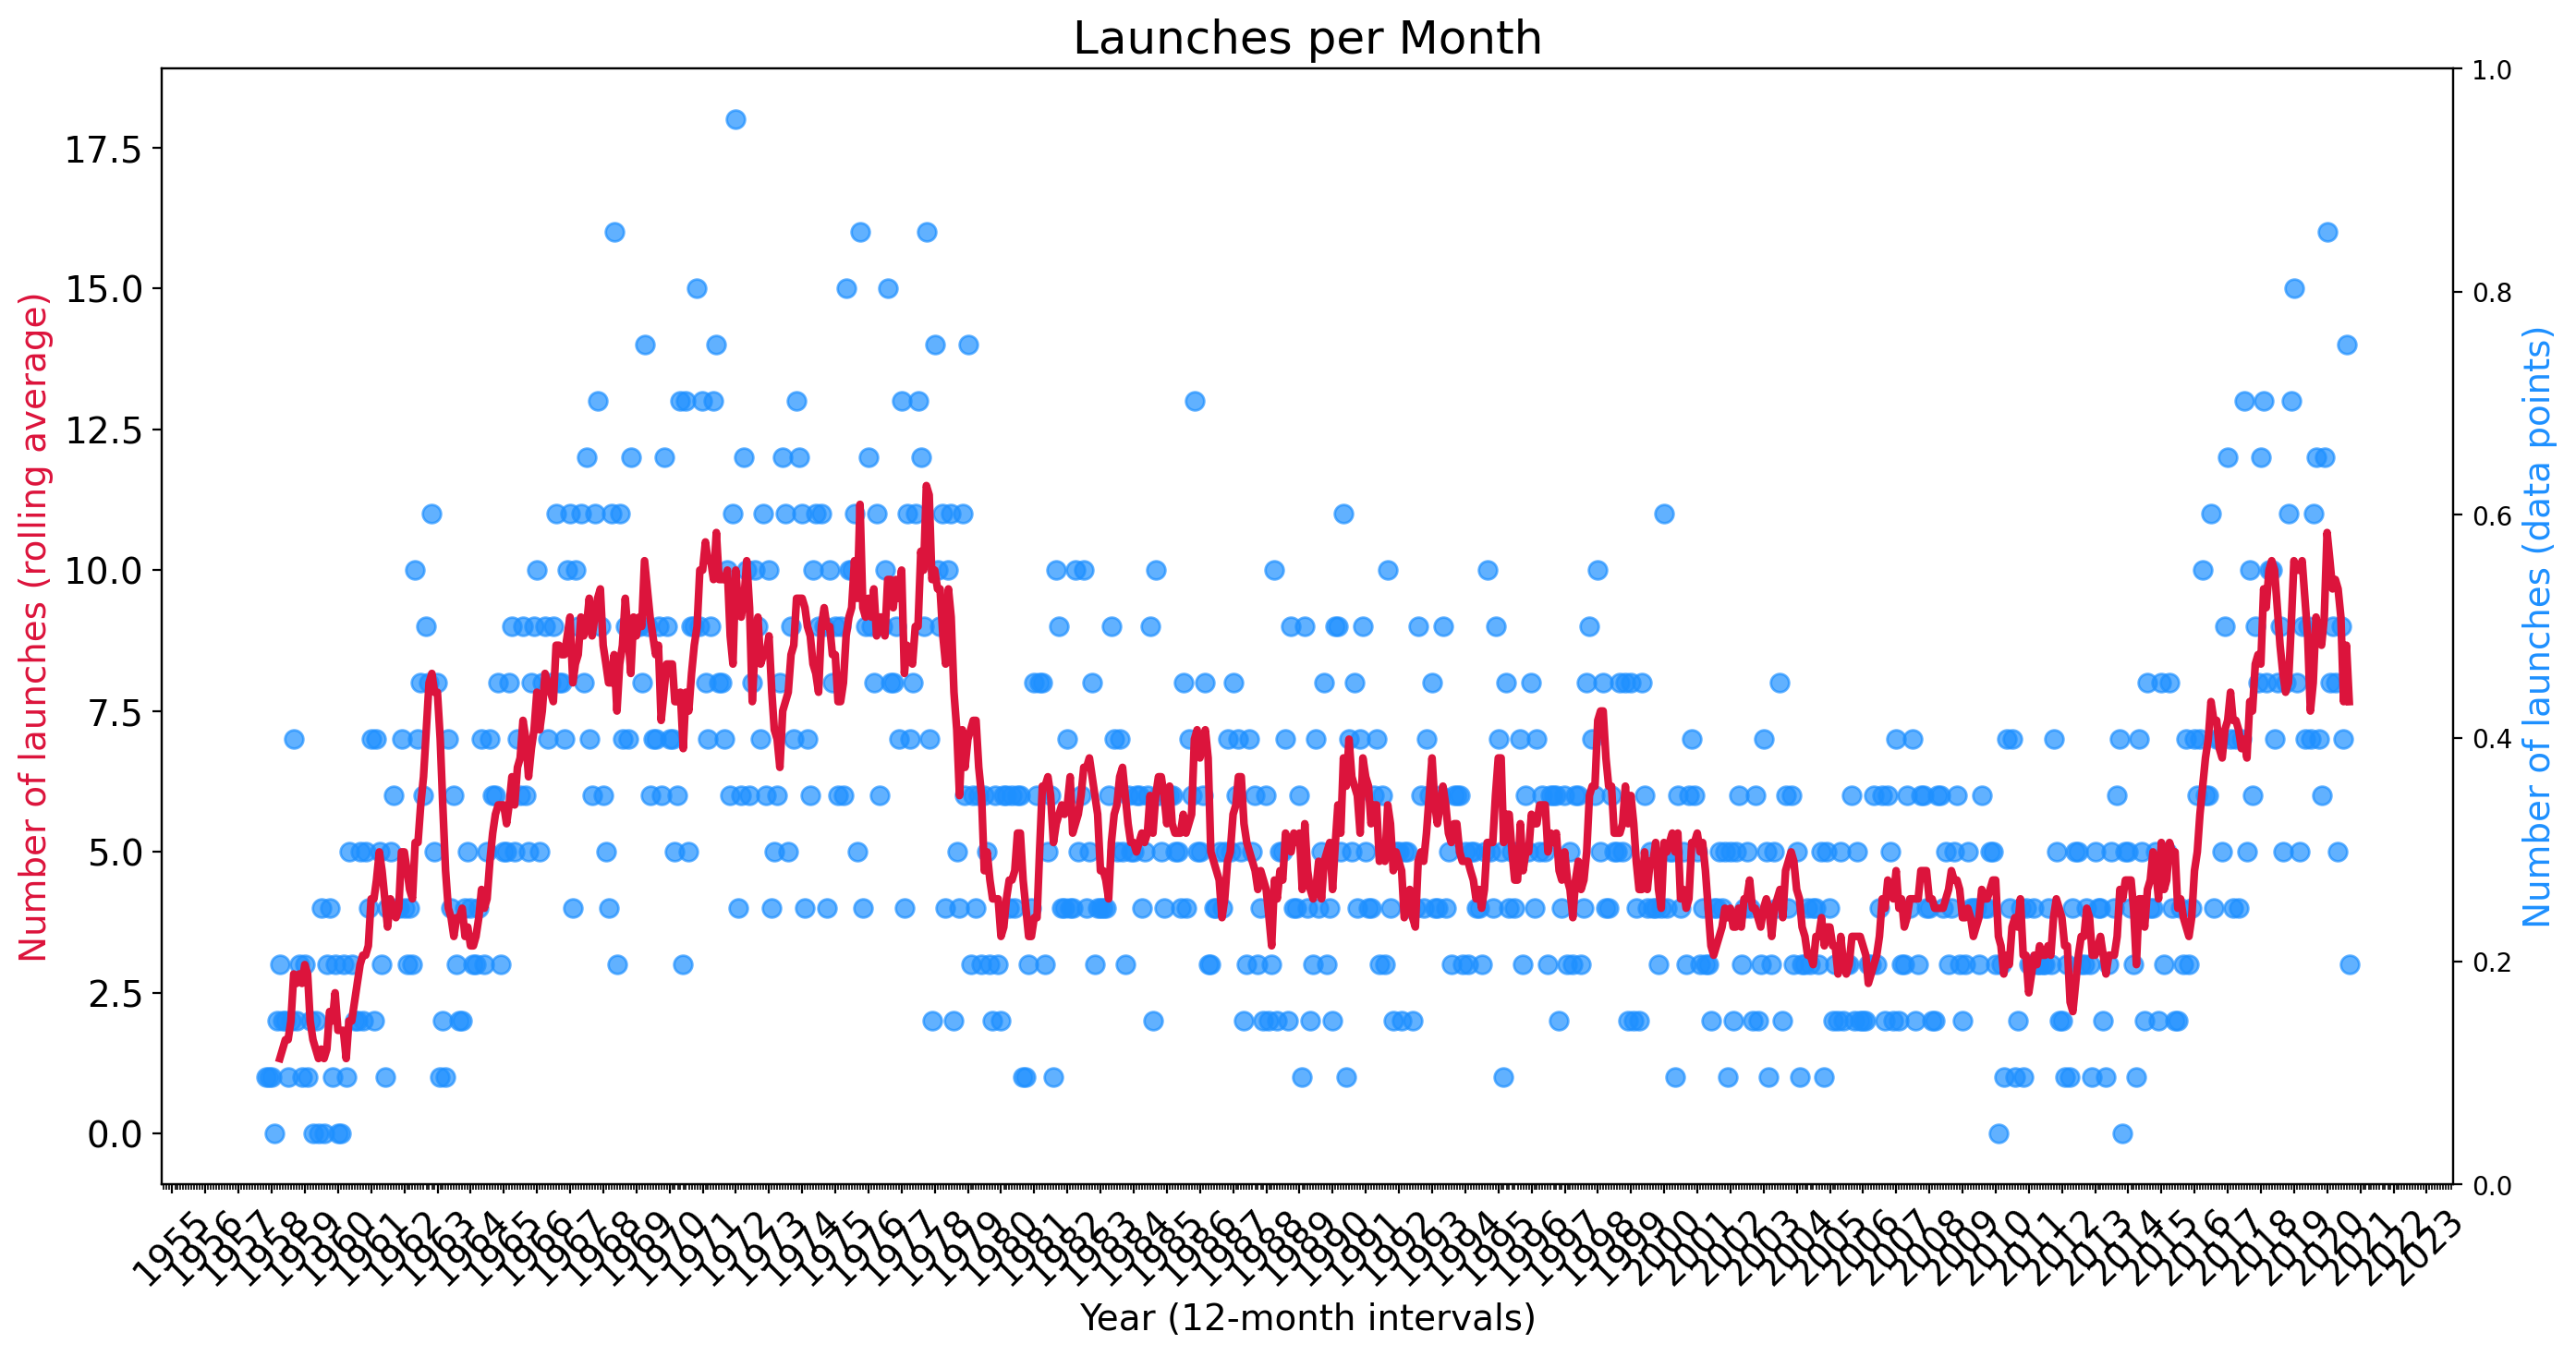

In [ ]:
plt.figure(figsize=(16,8), dpi=200)

plt.title("Launches per Month", fontsize=18)
plt.xlabel("Year (12-month intervals)", fontsize=14)
plt.ylabel("Number of launches", fontsize=14)
plt.yticks(fontsize = 14) 

# Increase the size, rotate the labels
plt.xticks(fontsize=14, rotation=45)

plt.scatter(x=launches_per_month.index,
            y=launches_per_month["Detail"],
            color = "dodgerblue",
            alpha = 0.7,
            s = 50)

plt.plot(roll_launches_month.index,
         roll_launches_month.values,
         color = "crimson",
         linewidth = 3)

# Get current axis to set ticks later and duplicate
ax = plt.gca()
ax2 = ax.twinx()

# Set titles on axis
ax.set_ylabel('Number of launches (rolling average)', color='crimson', fontsize=14)
ax2.set_ylabel('Number of launches (data points)', color='dodgerblue', fontsize=14)
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
# Simple way just counting the number of times each Launch Month value appears
launches_per_month = df_data_dt.value_counts("Launch Month")
launches_per_month.sort_index(ascending=True, inplace=True)
launches_per_month

Launch Month
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
dtype: int64

In [ ]:
fig = px.bar(x = launches_per_month.index,
             y= launches_per_month.values,
             title="Launches per Month (1955-2020)",
             color=launches_per_month.values)
fig.update_layout(yaxis_title='Month',
                  xaxis_title="Launch nr",
                  coloraxis_showscale=False)
fig.show()

In [ ]:
import calendar

# Get the month names corresponding to the numbers
month_names = [calendar.month_name[i] for i in range(1, 13)]

fig = px.bar(x=month_names,
             y=launches_per_month.values,
             title="Launches per Month (1955-2020)",
             color=launches_per_month.values)

fig.update_layout(yaxis_title='Month',
                  xaxis_title="Launch nr",
                  coloraxis_showscale=False)

fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
# I had to change put UTC as True to avoid errors in the net steps
clean_df['Date'] = pd.to_datetime(clean_df['Date'], utc=True)

<ipython-input-109-e15e1a00bb5e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_df["Launch Year"] = clean_df["Date"].dt.year
# Alternative
# df_data_dt['Launch Year'] = pd.DatetimeIndex(df_data_dt['Date']).year


<ipython-input-110-a70656499f94>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_df.sort_values(by="Date", ascending=True, inplace=True)
launch_price = clean_df.groupby(['Launch Year'], as_index=False).agg({'Price': pd.Series.mean})


<ipython-input-128-633f68a85606>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



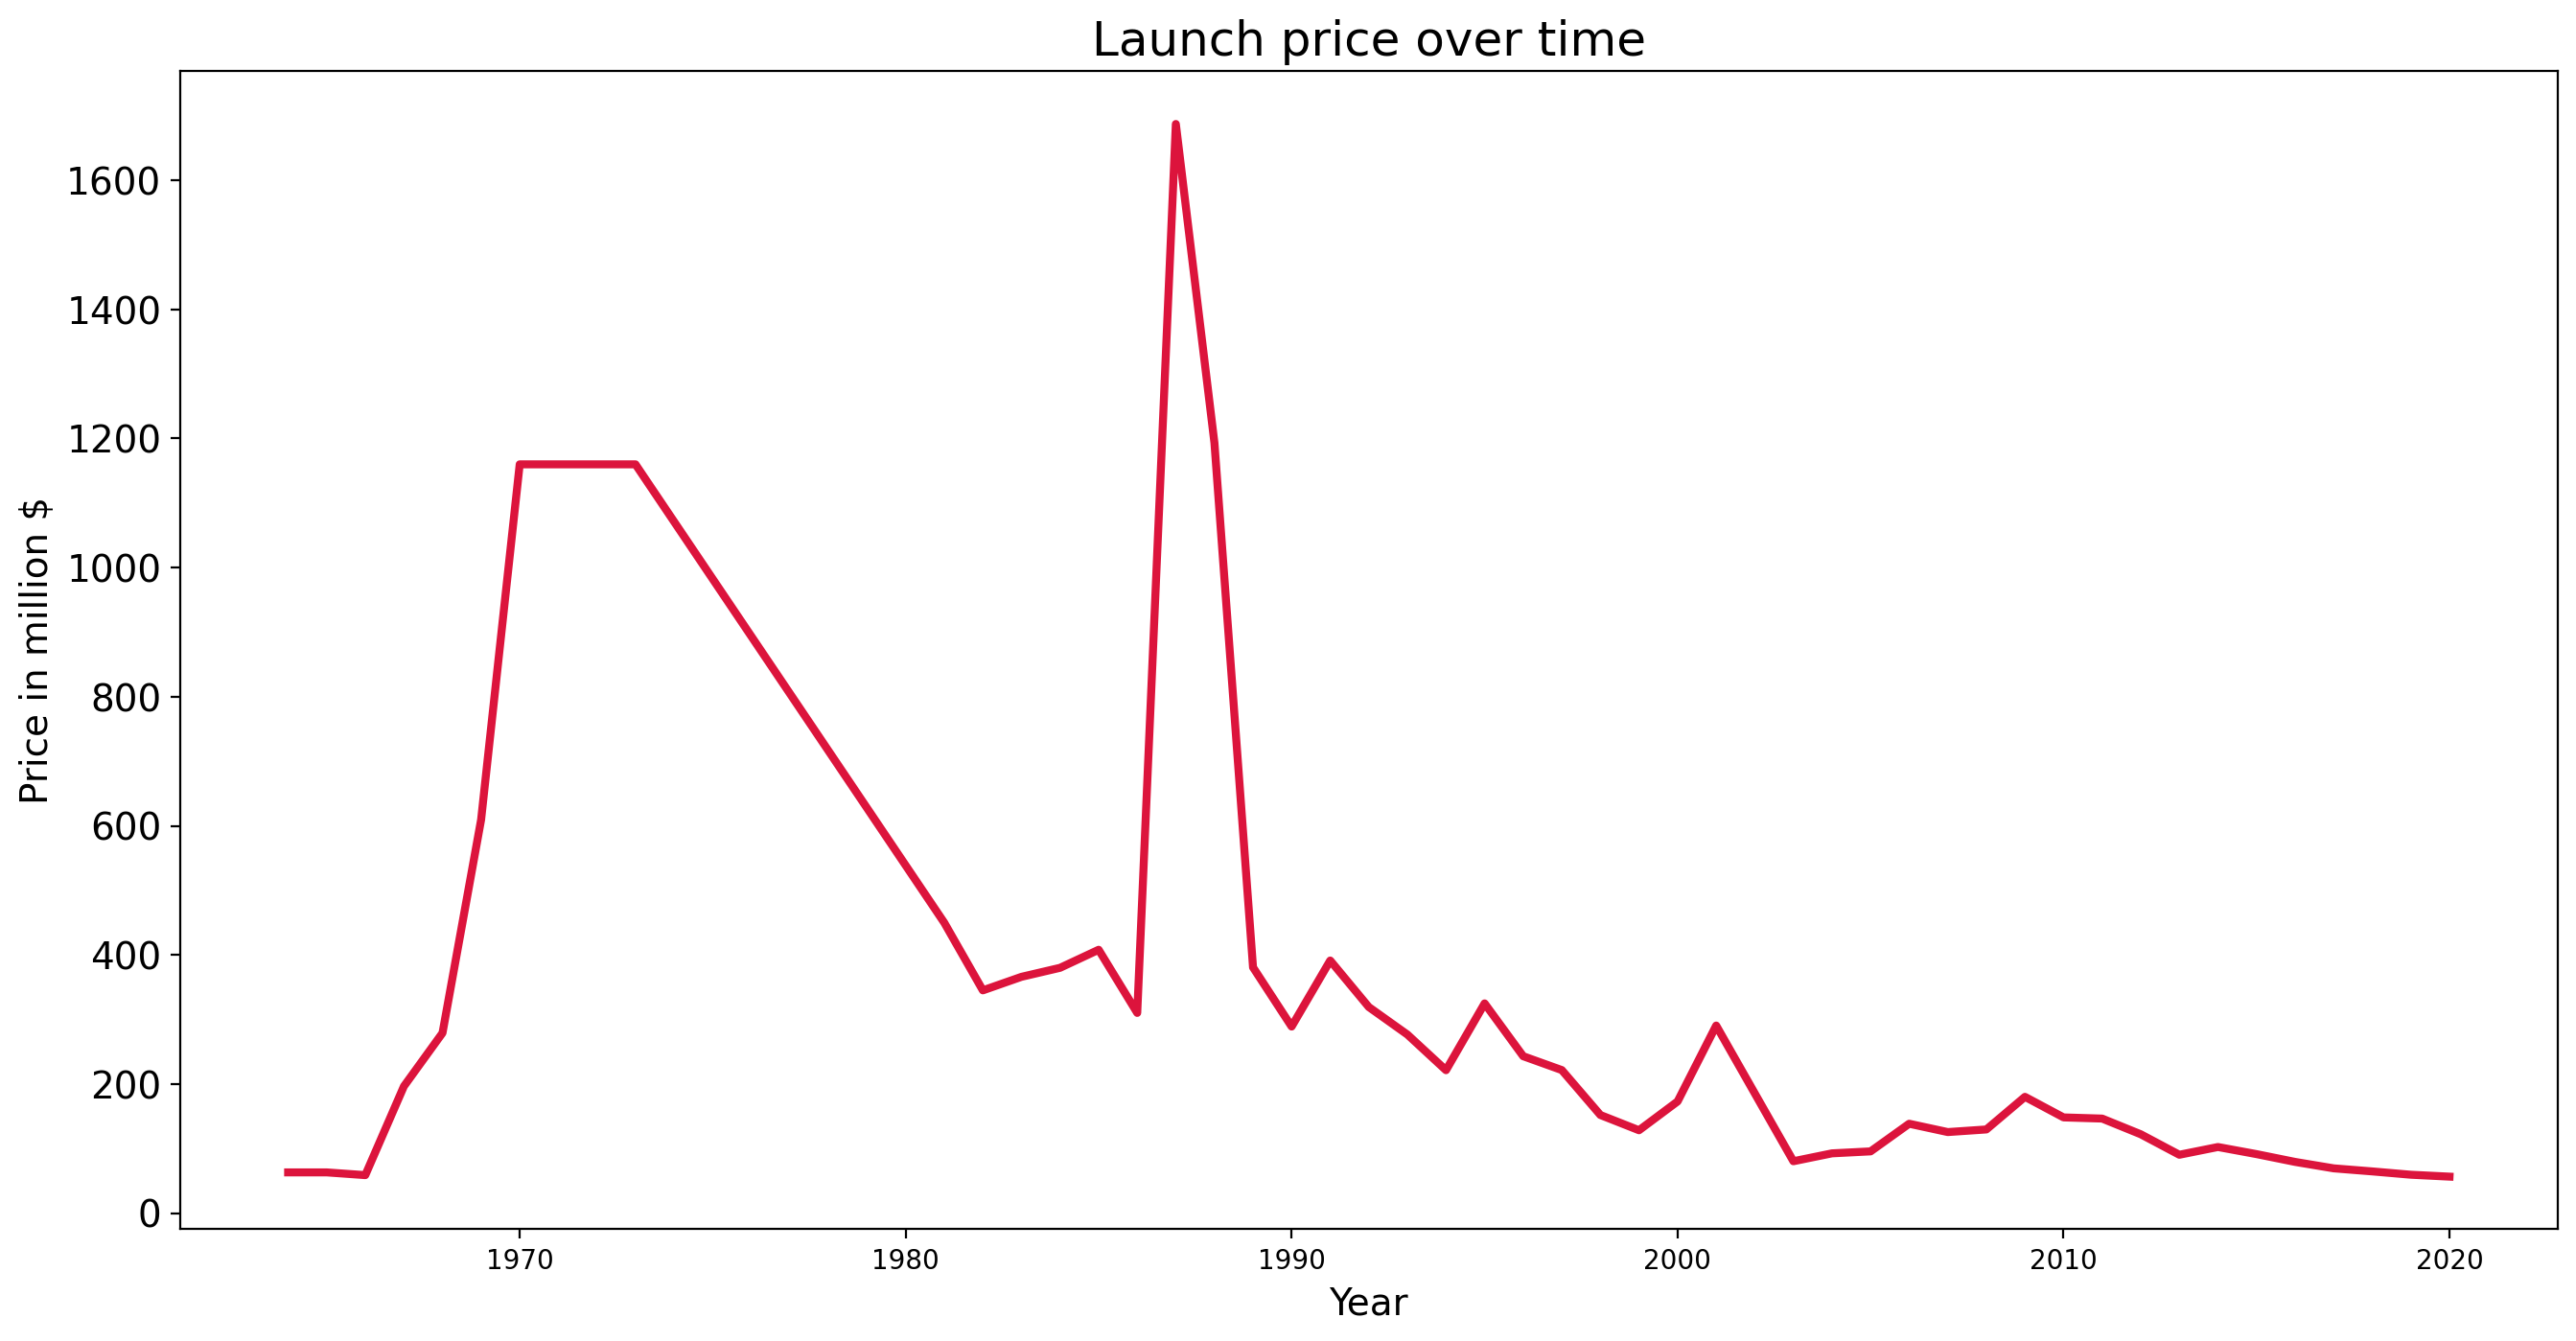

In [ ]:
plt.figure(figsize=(16,8), dpi=200)

plt.title("Launch price over time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price in million $", fontsize=14)
plt.yticks(fontsize = 14) 
# Increase the size, rotate the labels on the x-axis and create 5-year tick marks
# plt.xticks(ticks=np.arange(1950, 2025, step=5), fontsize=14, rotation=45)

plt.plot(launch_price["Launch Year"],
         launch_price["Price"],
         color = "crimson",
         linewidth = 3)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
df_data_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 4323 to 0
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    object             
 6   Mission_Status  4324 non-null   object             
 7   Country         4324 non-null   object             
 8   Launch Year     4324 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 337.8+ KB


In [ ]:
# Below it shows the problem of removing the NaN Price values for representing other things than Expenditure

In [ ]:
launch_over_time = clean_df.groupby(['Launch Year', "Organisation"], as_index=False).agg({'Detail': pd.Series.count})

<Figure size 3200x1600 with 0 Axes>

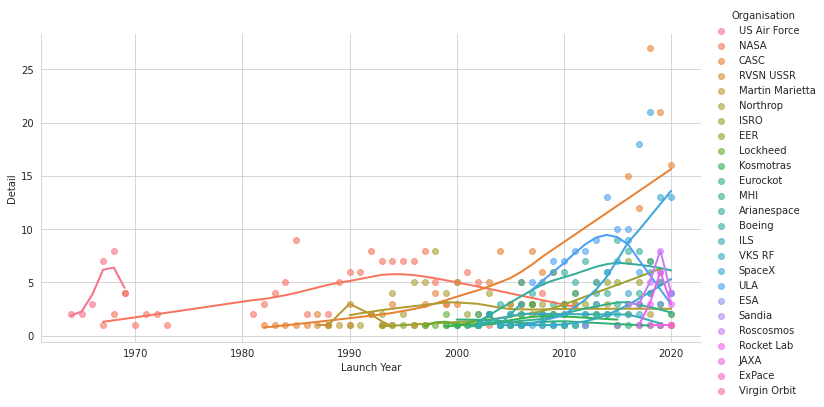

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(data=launch_over_time,
               x='Launch Year',
               y='Detail',
               hue='Organisation',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.6},
               line_kws={'linewidth': 2})
 
plt.show()

Now using the entire dataset

In [ ]:
launch_over_time = df_data_dt.groupby(['Launch Year', "Organisation"], as_index=False).agg({'Detail': pd.Series.count})

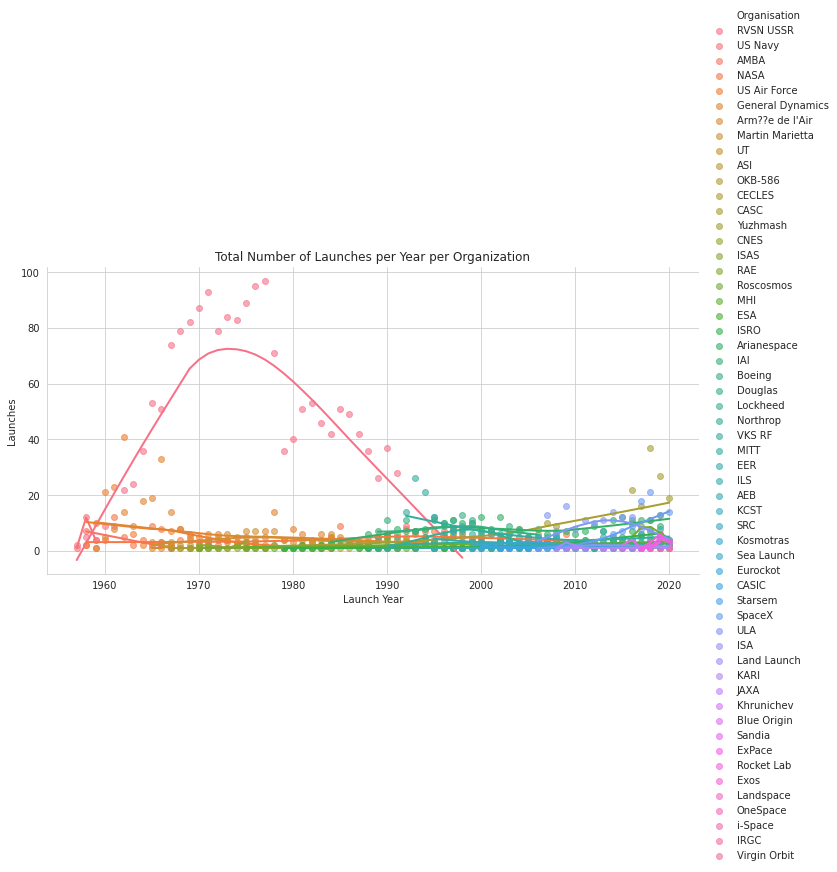

In [ ]:
with sns.axes_style("whitegrid"):
    graph = sns.lmplot(data=launch_over_time,
               x='Launch Year',
               y='Detail',
               hue='Organisation',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.6},
               line_kws={'linewidth': 2})

# Modify the title and axis labels
graph.set(title='Total Number of Launches per Year per Organization',
          ylabel="Launches")


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
# You can create a new DataFrame that includes only the data for USA, Russia, and Kazakhstan in the "Country" 
# column by using the loc method with a boolean condition
# we use the isin() method to filter the DataFrame based on the specified countries ('USA', 'Russia', 'Kazakhstan')
cold_war = df_data_dt.loc[df_data_dt['Country'].isin(['USA', 'Russia', 'Kazakhstan'])]
cold_war["Country"].value_counts()

Russia        1395
USA           1351
Kazakhstan     701
Name: Country, dtype: int64

In [ ]:
# Filter out the dates later than 1991 (USSR collapse)
cold_war = cold_war[cold_war["Launch Year"] <= 1991]
# Replace 'Kazakhstan' and 'Russia' with 'USSR'
cold_war['Country'].replace({'Kazakhstan': 'USSR', 'Russia': 'USSR'}, inplace=True)
cold_war["Country"].value_counts()

USSR    1770
USA      662
Name: Country, dtype: int64

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
cw_launch_nr = cold_war["Country"].value_counts()

In [ ]:
fig = px.pie(labels=cw_launch_nr.index,
             values=cw_launch_nr.values,
             title = "Launches by Cold War Superpower (1957-1991)",
             names = cw_launch_nr.index,
             hole = 0.6,
             color = cw_launch_nr.index,
             color_discrete_map={"USSR":"red",
                                 "USA":"royalblue"}
             )
fig.update_traces(textposition="outside", textinfo="percent+label", hoverinfo="label+value")
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:5069: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
launch_over_time_cw = cold_war.groupby(['Launch Year', "Country"], as_index=False).agg({'Detail': pd.Series.count}
                                                  

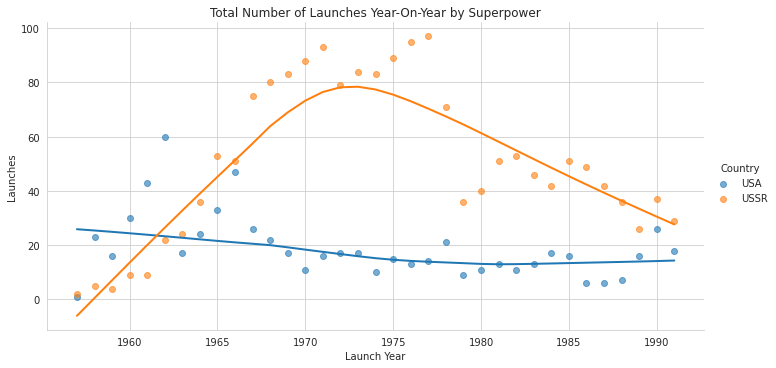

In [ ]:
with sns.axes_style("whitegrid"):
  graph = sns.lmplot(data=launch_over_time_cw,
               x='Launch Year',
               y='Detail',
               hue='Country',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.6},
               line_kws={'linewidth': 2})

# Modify the title and axis labels
graph.set(title='Total Number of Launches Year-On-Year by Superpower',
          ylabel="Launches")

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
cold_war["Mission_Status"].value_counts()

Success              2144
Failure               221
Partial Failure        66
Prelaunch Failure       1
Name: Mission_Status, dtype: int64

In [ ]:
# I am going to consider Partial Failures and Prelaunch Failures as part of the Failure category (aggregated)
cold_war_fail_aggr = cold_war
cold_war_fail_aggr["Mission_Status"] = cold_war_fail_aggr["Mission_Status"].replace("Partial Failure", "Failure")
cold_war_fail_aggr["Mission_Status"] = cold_war_fail_aggr["Mission_Status"].replace("Prelaunch Failure", "Failure")
cold_war_fail_aggr["Mission_Status"].value_counts()


Success    2144
Failure     288
Name: Mission_Status, dtype: int64

In [ ]:
# Using as_index=False we push all the data into columns rather than end up with our Categories as the index
df_mstatus_country_cw = cold_war_fail_aggr.groupby(["Country", "Mission_Status", "Launch Year"], as_index=False).agg({"Detail": pd.Series.count})
df_mstatus_country_cw.sort_values(by="Detail", ascending=False, inplace=True)
df_mstatus_country_cw.head(10)

,Country,Mission_Status,Launch Year,Detail
115,USSR,Success,1977,94
114,USSR,Success,1976,92
113,USSR,Success,1975,86
109,USSR,Success,1971,83
111,USSR,Success,1973,80
108,USSR,Success,1970,79
112,USSR,Success,1974,78
106,USSR,Success,1968,72
110,USSR,Success,1972,71
116,USSR,Success,1978,69


In [ ]:
df_failure_cw = df_mstatus_country_cw[df_mstatus_country_cw["Mission_Status"] == "Failure"]
df_failure_cw



,Country,Mission_Status,Launch Year,Detail
1,USA,Failure,1958,18
4,USA,Failure,1961,16
74,USSR,Failure,1969,15
3,USA,Failure,1960,14
72,USSR,Failure,1967,12
...,...,...,...,...
27,USA,Failure,1990,1
88,USSR,Failure,1984,1
91,USSR,Failure,1987,1
92,USSR,Failure,1989,1


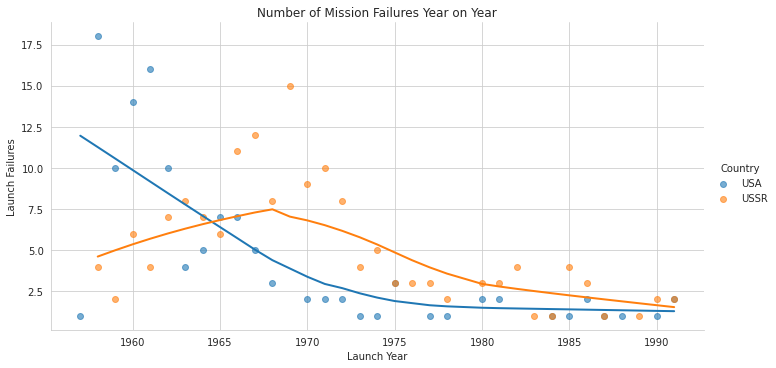

In [ ]:
with sns.axes_style("whitegrid"):
    graph = sns.lmplot(data=df_failure_cw,
                       x='Launch Year',
                       y='Detail',
                       hue='Country',
                       lowess=True, 
                       aspect=2,
                       scatter_kws={'alpha': 0.6},
                       line_kws={'linewidth': 2})
    
# Modify the title and axis labels
graph.set(title='Number of Mission Failures Year on Year',
          ylabel="Launch Failures")


Calculating mission success and failure rate and including them as new columns into the df_mstatus_country DataFrame

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
# Create a new DataFrame that groups the data by country and mission status
grouped_df = df_mstatus_country_cw.groupby(["Country", "Mission_Status", "Launch Year"]).sum().reset_index()
grouped_df

# Create a pivot table with the sum of 'Detail' for each combination of 'Country', 'Mission_Status', and 'Launch Year'
pivot_df = pd.pivot_table(grouped_df, values='Detail', index=['Country', 'Launch Year'], columns=['Mission_Status'], aggfunc='sum')
pivot_df.fillna(0, inplace=True)

# Reset the index to create separate columns for 'Country' and 'Launch Year'
pivot_df = pivot_df.reset_index()
pivot_df

#Calculating the Failure ratio
pivot_df["Failure Ratio"] = pivot_df["Failure"] * 100 / (pivot_df["Success"] + pivot_df["Failure"])
pivot_df


Mission_Status,Country,Launch Year,Failure,Success,Failure Ratio
0,USA,1957,1.0,0.0,100.000000
1,USA,1958,18.0,5.0,78.260870
2,USA,1959,10.0,6.0,62.500000
3,USA,1960,14.0,16.0,46.666667
4,USA,1961,16.0,27.0,37.209302
...,...,...,...,...,...
65,USSR,1987,1.0,41.0,2.380952
66,USSR,1988,0.0,36.0,0.000000
67,USSR,1989,1.0,25.0,3.846154
68,USSR,1990,2.0,35.0,5.405405


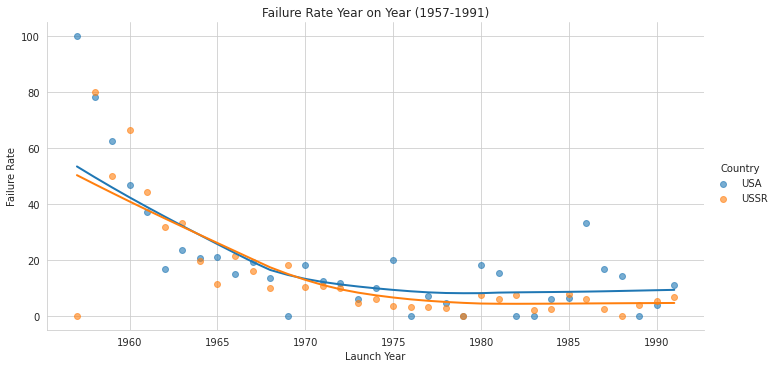

In [ ]:
with sns.axes_style("whitegrid"):
    graph = sns.lmplot(data=pivot_df,
                       x='Launch Year',
                       y='Failure Ratio',
                       hue='Country',
                       lowess=True, 
                       aspect=2,
                       scatter_kws={'alpha': 0.6},
                       line_kws={'linewidth': 2})
    
# Modify the title and axis labels
graph.set(title='Failure Rate Year on Year (1957-1991)',
          ylabel="Failure Rate")


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
launch_over_time_ct = clean_df.groupby(['Launch Year', "Country"], as_index=False).agg({'Detail': pd.Series.count})

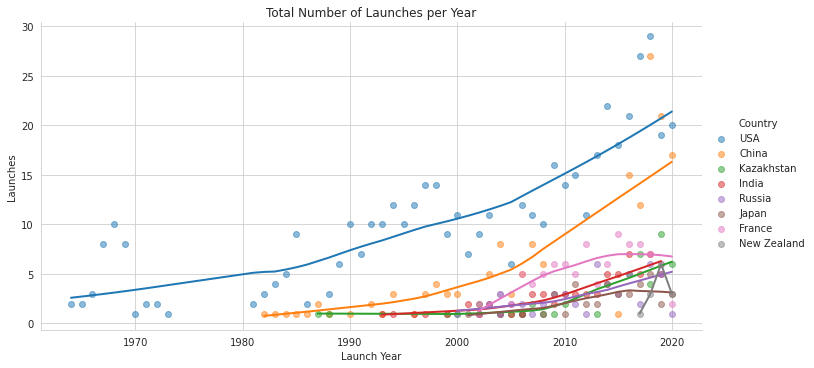

In [ ]:
with sns.axes_style("whitegrid"):
    graph = sns.lmplot(data=launch_over_time_ct,
               x='Launch Year',
               y='Detail',
               hue='Country',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 2})
 
# Modify the title and axis labels
graph.set(title='Total Number of Launches per Year',
          ylabel="Launches")


In [ ]:
clean_df_s = clean_df[clean_df["Mission_Status"] == "Success"]
launch_over_time_ct_s = clean_df_s.groupby(['Launch Year', "Country"], as_index=False).agg({'Detail': pd.Series.count})

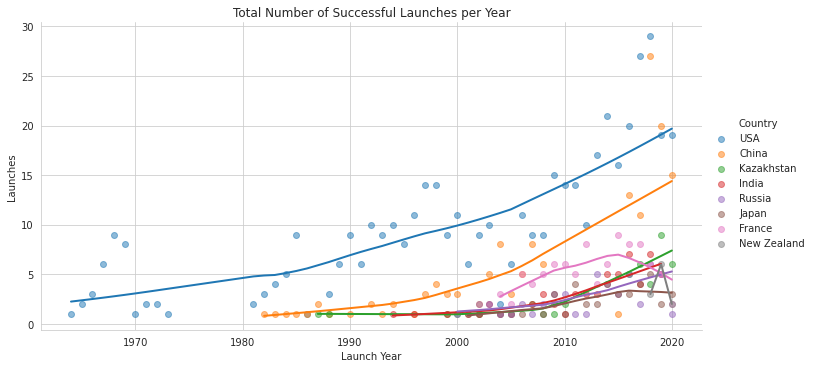

In [ ]:
with sns.axes_style("whitegrid"):
    graph = sns.lmplot(data=launch_over_time_ct_s,
               x='Launch Year',
               y='Detail',
               hue='Country',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 2})
 
# Modify the title and axis labels
graph.set(title='Total Number of Successful Launches per Year',
          ylabel="Launches")

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
cold_war = df_data_dt.loc[df_data_dt['Country'].isin(['USA', 'Russia', 'Kazakhstan', "China"])]
launch_over_time_2 = cold_war.groupby(['Launch Year', "Organisation"], as_index=False).agg({'Detail': pd.Series.count})

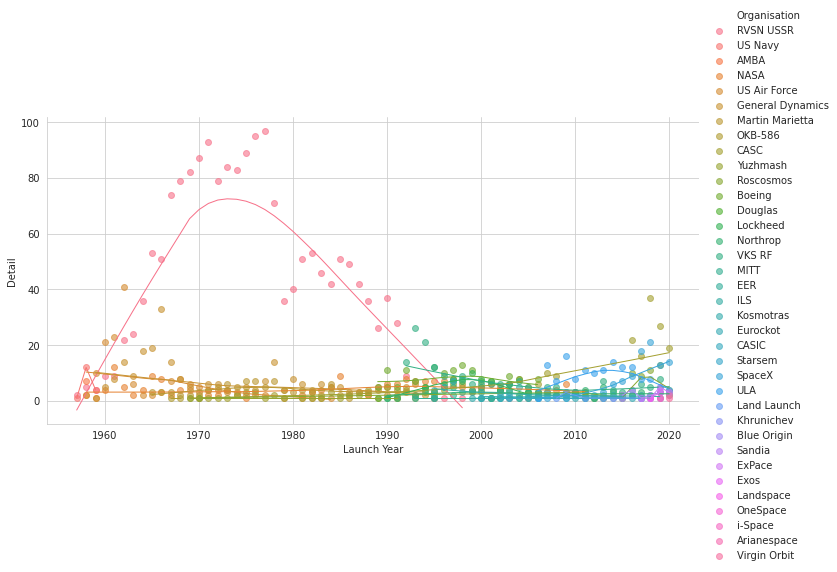

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=launch_over_time_2,
               x='Launch Year',
               y='Detail',
               hue='Organisation',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.6},
               line_kws={'linewidth': 1})
 
# Modify the title and axis labels
graph.set(title='Total Number of Launches per Year per Organization',
          ylabel="Launches")

In [ ]:
launch_over_time = df_data_dt.groupby(['Launch Year', "Organisation"], as_index=False).agg({'Detail': pd.Series.count})

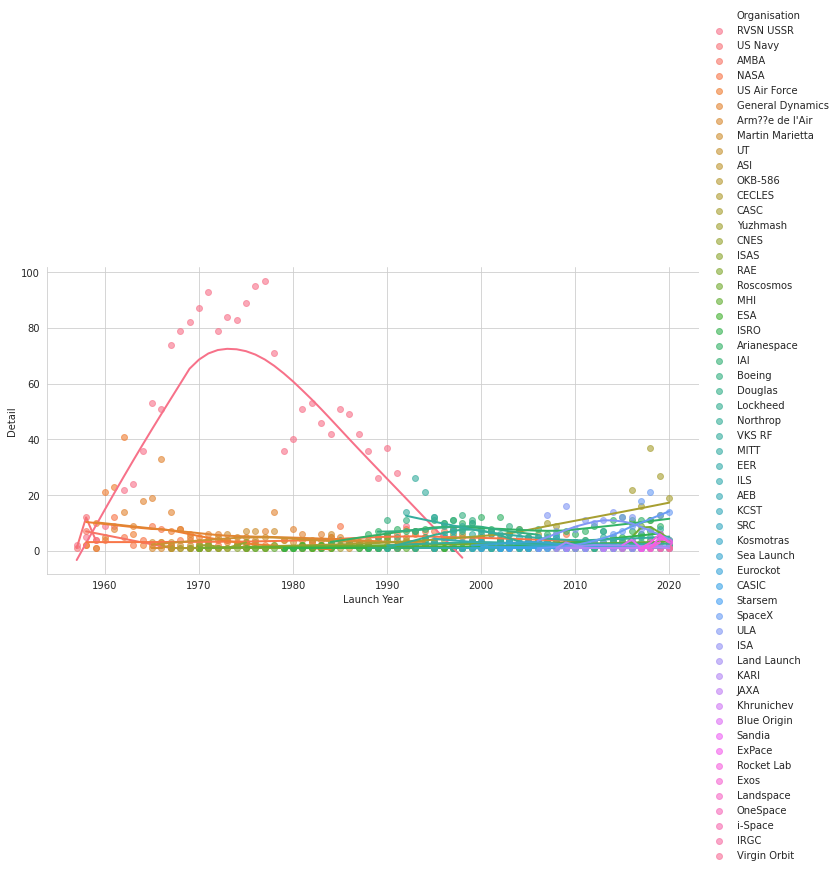

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=launch_over_time,
               x='Launch Year',
               y='Detail',
               hue='Organisation',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.6},
               line_kws={'linewidth': 2})
    
# Modify the title and axis labels
graph.set(title='Total Number of Launches per Year per Organization',
          ylabel="Launches")